<a href="https://colab.research.google.com/github/sitinatazha/Capstone-Project-Studi-Independent-MyEduSolve/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score

from flask import Flask,jsonify,request,render_template

%matplotlib inline

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/kelas python/Capstone.xlsx')
df.shape

(6484, 52)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,ID,Usia,Jenis Kelamin,Tempat tinggal saat ini,Pilihan pertama program yang diminati,Sebagian besar hidup saya dilalui untuk melakukan hal yang bermakna,"Dengan berusaha keras, saya hampir selalu bisa mencapai tujuan",Saya tidak ingin mengubah aktivitas rutin yang biasa saya lakukan,Saya merasa bahwa terkadang hidup saya tidak bermakna,Melakukan hal yang berbeda dari biasanya merupakan hal yang menarik bagi saya,...,11. Saya selalu merubah pilihan jalur karir saya.,"12. Saat memilih karir, saya akan bertanya kepada orang lain untuk membantu saya.",13. Saya tidak akan khawatir dalam memilih pekerjaan selama saya belum lulus kuliah.,14. Saya tidak tahu kelas apa yang harus saya pilih.,15. Saya akan memilih karir saya tanpa memperdulikan perasaan orang lain.,16.Saya tidak tahu apakah perencanaan karir saya realistis atau tidak.,"17. Banyak hal yang harus dipertimbangkan dalam memilih sebuah pekerjaan, maka akan sulit untuk membuat keputusan karir.",18. Saya benar-benar tidak bisa menemukan sebuah pekerjaan yang menarik bagi saya.,19. Saya tidak paham bagaimana orang lain dapat begitu yakin dengan apa yang ingin mereka lakukan.,"20. Dalam memilih karir, saya harus memperhatikan pikiran dan perasaan keluarga saya."
0,2715,20,Laki-laki,Jawa Timur,Data Science Track,3,3,2,1,3,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
1,6084,22,Laki-laki,DKI Jakarta,Career Ready Track,3,4,3,2,4,...,1.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
2,4664,20,Laki-laki,Jawa Timur,Adobe Certified Professional in Visual Design,4,4,2,1,4,...,3.0,3.0,1.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0
3,2497,20,Perempuan,Sumatera Utara,Career Ready Track,4,3,4,2,4,...,1.0,3.0,4.0,4.0,3.0,1.0,3.0,3.0,2.0,4.0
4,6982,21,Laki-laki,Lampung,Data Science Track,4,4,3,1,4,...,4.0,1.0,3.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 52 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                               --------------  -----  
 0   ID                                                                                                                                   6484 non-null   int64  
 1   Usia                                                                                                                                 6484 non-null   object 
 2   Jenis Kelamin                                                                                                                        6484 non-null   object 
 3   Tempat tinggal saat ini                                                       

In [ ]:
df.describe()

,ID,Sebagian besar hidup saya dilalui untuk melakukan hal yang bermakna,"Dengan berusaha keras, saya hampir selalu bisa mencapai tujuan",Saya tidak ingin mengubah aktivitas rutin yang biasa saya lakukan,Saya merasa bahwa terkadang hidup saya tidak bermakna,Melakukan hal yang berbeda dari biasanya merupakan hal yang menarik bagi saya,Sesuatu terjadi dalam hidup tergantung pada apa yang saya lakukan,Saya menantikan kegiatan rutin sehari-hari,Tidak terdapat banyak hal yang bisa saya lakukan untuk mempengaruhi masa depan saya,Saya menikmati tantangan saat saya harus melakukan beberapa hal dalam satu waktu,...,11. Saya selalu merubah pilihan jalur karir saya.,"12. Saat memilih karir, saya akan bertanya kepada orang lain untuk membantu saya.",13. Saya tidak akan khawatir dalam memilih pekerjaan selama saya belum lulus kuliah.,14. Saya tidak tahu kelas apa yang harus saya pilih.,15. Saya akan memilih karir saya tanpa memperdulikan perasaan orang lain.,16.Saya tidak tahu apakah perencanaan karir saya realistis atau tidak.,"17. Banyak hal yang harus dipertimbangkan dalam memilih sebuah pekerjaan, maka akan sulit untuk membuat keputusan karir.",18. Saya benar-benar tidak bisa menemukan sebuah pekerjaan yang menarik bagi saya.,19. Saya tidak paham bagaimana orang lain dapat begitu yakin dengan apa yang ingin mereka lakukan.,"20. Dalam memilih karir, saya harus memperhatikan pikiran dan perasaan keluarga saya."
count,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,...,6455.000000,6451.000000,6458.000000,6455.000000,6449.000000,6461.000000,6452.000000,6460.000000,6454.000000,6469.000000
mean,4242.500000,3.520820,3.555676,2.297656,1.840068,3.654072,3.605182,3.038402,1.538402,3.431215,...,2.881642,2.731980,3.040570,3.229899,2.698558,2.765671,2.410105,3.242415,2.928416,2.910496
std,1871.913905,0.550432,0.557769,0.784070,0.843184,0.551677,0.571748,0.758665,0.784848,0.654170,...,0.861817,0.912412,1.003121,0.950171,0.933422,0.945351,0.912619,0.941909,0.964175,0.873330
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2621.750000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,4242.500000,4.000000,4.000000,2.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000,...,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000
75%,5863.250000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,...,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000
max,7484.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/kelas python/Capstone22.xlsx')

# **PREPROCESSING**

In [ ]:
df2 = df.copy()
df2.head()

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,x50,x51,total_personality,total_carrer
0,2715,20,Laki-laki,Jawa Timur,Data Science Track,3,3,2,1,3,...,3,3,3,3,3,4,3,3,60,75
1,6084,22,Laki-laki,DKI Jakarta,Career Ready Track,3,4,3,2,4,...,4,3,3,3,3,3,3,4,70,68
2,4664,20,Laki-laki,Jawa Timur,Adobe Certified Professional in Visual Design,4,4,2,1,4,...,1,4,1,4,4,4,4,4,67,77
3,2497,20,Perempuan,Sumatera Utara,Career Ready Track,4,3,4,2,4,...,4,4,3,1,3,3,2,4,76,72
4,6982,21,Laki-laki,Lampung,Data Science Track,4,4,3,1,4,...,3,4,4,4,2,4,4,4,76,76


In [ ]:
categorical = df2.select_dtypes(include=["object"])

le = LabelEncoder()
for col in categorical:
  df2[col] = le.fit_transform(df2[col])

df2.dtypes

ID                   int64
x1                   int64
x2                   int64
x3                   int64
x4                   int64
x5                   int64
x6                   int64
x7                   int64
x8                   int64
x9                   int64
x10                  int64
x11                  int64
x12                  int64
x13                  int64
x14                  int64
x15                  int64
x16                  int64
x17                  int64
x18                  int64
x19                  int64
x20                  int64
x21                  int64
x22                  int64
x23                  int64
x24                  int64
x25                  int64
x26                  int64
x27                  int64
x28                  int64
x29                  int64
x30                  int64
x31                  int64
x32                  int64
x33                  int64
x34                  int64
x35                  int64
x36                  int64
x

In [ ]:
sc = StandardScaler()

df2 = pd.DataFrame(sc.fit_transform(df2), columns=df2.columns)
df2

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,x50,x51,total_personality,total_carrer
0,-0.815896,-0.667067,-1.251038,-0.249508,0.406828,-0.946553,-0.996326,-0.379548,-0.996134,-1.186138,...,-0.044146,-0.246024,0.321905,0.247055,0.649708,0.801605,0.073635,0.102410,-1.873392,0.742969
1,0.983805,0.993427,-1.251038,-0.711036,-0.156285,-0.946553,0.796618,0.895843,0.189932,0.626771,...,0.952913,-0.246024,0.321905,0.247055,0.649708,-0.260973,0.073635,1.248912,0.255074,-0.021308
2,0.225249,-0.667067,-1.251038,-0.249508,-0.719399,0.870313,0.796618,-0.379548,-0.996134,0.626771,...,-2.038265,0.807295,-1.825896,1.306888,1.747573,0.801605,1.113502,1.248912,-0.383465,0.961334
3,-0.932351,-0.667067,0.799336,2.404279,-0.156285,0.870313,-0.996326,2.171235,0.189932,0.626771,...,0.952913,0.807295,0.321905,-1.872611,0.649708,-0.260973,-0.966233,1.248912,1.532154,0.415422
4,1.463511,0.163180,-1.251038,0.673548,0.406828,0.870313,0.796618,0.895843,-0.996134,0.626771,...,-0.044146,0.807295,1.395805,1.306888,-0.448156,0.801605,1.113502,1.248912,1.532154,0.852151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,0.398328,0.993427,-1.251038,-0.595654,0.969942,-0.946553,0.796618,-0.379548,1.375997,0.626771,...,0.952913,0.807295,0.321905,0.247055,-1.546021,0.801605,0.073635,1.248912,-1.022005,0.415422
6478,-1.015685,-0.667067,-1.251038,0.904313,-0.719399,0.870313,0.796618,-0.379548,-0.996134,0.626771,...,0.952913,0.807295,0.321905,1.306888,1.747573,0.801605,1.113502,-2.190593,1.106461,1.616428
6479,0.542026,0.993427,-1.251038,2.173515,0.969942,0.870313,0.796618,0.895843,-0.996134,-1.186138,...,-0.044146,-1.299342,-0.751995,-1.872611,-0.448156,-2.386128,0.073635,1.248912,0.680768,-1.113131
6480,-1.673812,0.163180,-1.251038,-0.711036,0.406828,-0.946553,0.796618,-1.654939,1.375997,0.626771,...,0.952913,0.807295,-1.825896,1.306888,-1.546021,0.801605,1.113502,-2.190593,0.467921,0.742969


In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2'])

principalDf

,PC1,PC2
0,-0.804681,2.096078
1,1.825520,2.277671
2,-3.369637,1.401463
3,-1.011080,-1.526881
4,-3.783111,-1.690026
...,...,...
6477,-0.754701,1.014089
6478,-5.329249,-0.602043
6479,4.162679,-0.144435
6480,-4.125514,-0.055845


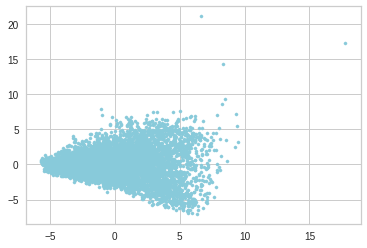

In [ ]:
plt.scatter(principalDf.PC1, principalDf.PC2, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [ ]:
data = principalDf.iloc[:, 0:2]
data.head()

,PC1,PC2
0,-0.804681,2.096078
1,1.825520,2.277671
2,-3.369637,1.401463
3,-1.011080,-1.526881
4,-3.783111,-1.690026


In [ ]:
x_array = np.array(data)
print(x_array)

[[-0.80468086  2.09607824]
 [ 1.82551993  2.2776712 ]
 [-3.36963711  1.40146308]
 ...
 [ 4.16267949 -0.14443542]
 [-4.12551436 -0.05584481]
 [ 0.95903094 -1.80899913]]


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=123)

In [ ]:
kmeans.fit(x_array)

KMeans(n_clusters=3, random_state=123)

In [ ]:
print(kmeans.cluster_centers_)

[[-2.14565969 -0.08788433]
 [ 2.65506936  2.61377555]
 [ 2.9855434  -2.29308745]]


In [ ]:
df2["cluster"] = kmeans.labels_

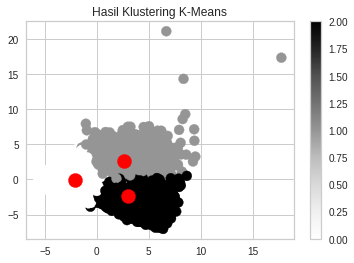

In [ ]:
output = plt.scatter(x_array[:,0], x_array[:,1], s = 100, c = df2.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [ ]:
df2.head()

,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x45,x46,x47,x48,x49,x50,x51,total_personality,total_carrer,cluster
0,-0.815896,-0.667067,-1.251038,-0.249508,0.406828,-0.946553,-0.996326,-0.379548,-0.996134,-1.186138,...,-0.246024,0.321905,0.247055,0.649708,0.801605,0.073635,0.102410,-1.873392,0.742969,0
1,0.983805,0.993427,-1.251038,-0.711036,-0.156285,-0.946553,0.796618,0.895843,0.189932,0.626771,...,-0.246024,0.321905,0.247055,0.649708,-0.260973,0.073635,1.248912,0.255074,-0.021308,1
2,0.225249,-0.667067,-1.251038,-0.249508,-0.719399,0.870313,0.796618,-0.379548,-0.996134,0.626771,...,0.807295,-1.825896,1.306888,1.747573,0.801605,1.113502,1.248912,-0.383465,0.961334,0
3,-0.932351,-0.667067,0.799336,2.404279,-0.156285,0.870313,-0.996326,2.171235,0.189932,0.626771,...,0.807295,0.321905,-1.872611,0.649708,-0.260973,-0.966233,1.248912,1.532154,0.415422,0
4,1.463511,0.163180,-1.251038,0.673548,0.406828,0.870313,0.796618,0.895843,-0.996134,0.626771,...,0.807295,1.395805,1.306888,-0.448156,0.801605,1.113502,1.248912,1.532154,0.852151,0


In [ ]:
df2['cluster'].value_counts()

0    3680
2    1429
1    1373
Name: cluster, dtype: int64

In [ ]:
df2.to_excel("output.xlsx",
             sheet_name='Sheet_name_1')

In [ ]:
df2.to_excel('/content/Kel7 (1).xlsx')